In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
DATA_PATH = Path(r"C:\Users\gluzk\Desktop\parsed_data")
DATA_PATH = Path(r"C:\Users\Gert\Desktop\parsed_data")
NO_CHEATER_PATH = Path.joinpath(DATA_PATH, 'no_cheater_present')
CHEATER_PATH = Path.joinpath(DATA_PATH, 'with_cheater_present')

EVENT_FILE_TYPE = ".json"
TICK_FILE_TYPE = ".parquet"

print(f"Cheater path     : {CHEATER_PATH}")
print(f"No cheaters path : {NO_CHEATER_PATH}")
all_players = ["Player_1", "Player_2", "Player_3", "Player_4", "Player_5", "Player_6", "Player_7", "Player_8", "Player_9", "Player_10"]

Cheater path     : C:\Users\Gert\Desktop\parsed_data\with_cheater_present
No cheaters path : C:\Users\Gert\Desktop\parsed_data\no_cheater_present


In [5]:
# Loading json event data a list of tuples (str, pd.Dataframe)
def json_2_eventlist(filepath:str) -> list[tuple[str, pd.DataFrame]]:   
    with open(filepath, "r") as f:
        json_data = json.load(f)

    data = []       

    for key, value in json_data.items():
        if isinstance(value, list):
            df = pd.DataFrame(value)
            data.append((key, df))

    return data


In [40]:
total_cdata = 0
cheater_cdata = 0

for events_file in CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    events = json_2_eventlist(events_file)
    round_ended_idx = -1
    for idx, i in enumerate(events):
        if i[0] == 'round_officially_ended':
            round_ended_idx = idx
            break
    if round_ended_idx == -1:
        raise Exception('round end idx not found')
    last_rounds = events[round_ended_idx][1]
    last_round_end_tick = np.array(last_rounds)[-1][0]
    total_cdata += last_round_end_tick
    
seconds_to_hours = 64 * 3600
print(f"Total number of ticks within cheater dataset: {total_cdata}")
print(f"Total number gameplay hours within cheater dataset: {round(total_cdata / seconds_to_hours, 1)}")

Total number of ticks within cheater dataset: 21503010
Total number gameplay hours within cheater dataset: 93.3


In [41]:
total_ncdata = 0

for events_file in NO_CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    events = json_2_eventlist(str(events_file).replace('.parquet', '.json'))
    round_ended_idx = -1
    for idx, i in enumerate(events):
        if i[0] == 'round_officially_ended':
            round_ended_idx = idx
            break
    if round_ended_idx == -1:
        continue
    last_rounds = events[round_ended_idx][1]
    last_round_end_tick = np.array(last_rounds)[-1][0]
    total_ncdata += last_round_end_tick

print(f"Total number of ticks within not cheater dataset: {total_ncdata}")
print(f"Total number of gameplay hours within not cheater dataset: {round(total_ncdata / seconds_to_hours, 1)}")

Total number of ticks within not cheater dataset: 47778477
Total number of gameplay hours within not cheater dataset: 207.4


In [50]:
for pq_file in CHEATER_PATH.glob("*" + TICK_FILE_TYPE):
    ticks = pd.read_parquet(pq_file)
    # print(ticks.columns)
    for i in ticks.columns:
        print(r"        \item \texttt{" + i.replace("_", "\_") + "}")
    break

        \item \texttt{inventory}
        \item \texttt{usercmd\_input\_history}
        \item \texttt{inventory\_as\_ids}
        \item \texttt{approximate\_spotted\_by}
        \item \texttt{aim\_punch\_angle\_vel}
        \item \texttt{aim\_punch\_angle}
        \item \texttt{active\_weapon\_ammo}
        \item \texttt{item\_def\_idx}
        \item \texttt{weapon\_quality}
        \item \texttt{entity\_lvl}
        \item \texttt{item\_id\_high}
        \item \texttt{item\_id\_low}
        \item \texttt{inventory\_position}
        \item \texttt{is\_initialized}
        \item \texttt{econ\_item\_attribute\_def\_idx}
        \item \texttt{initial\_value}
        \item \texttt{refundable\_currency}
        \item \texttt{set\_bonus}
        \item \texttt{fire\_seq\_start\_time}
        \item \texttt{fire\_seq\_start\_time\_change}
        \item \texttt{m\_iState}
        \item \texttt{weapon\_mode}
        \item \texttt{accuracy\_penalty}
        \item \texttt{i\_recoil\_idx}
        \it

In [66]:
all_events = set()
for ev_file in CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    ev = json_2_eventlist(ev_file)
    for i in ev:
        all_events.add(i[0])

for i in all_events:
    print(r"        \item \texttt{" + i.replace("_","\_") + "}")



        \item \texttt{round\_prestart}
        \item \texttt{begin\_new\_match}
        \item \texttt{decoy\_started}
        \item \texttt{player\_team}
        \item \texttt{cheaters}
        \item \texttt{item\_pickup}
        \item \texttt{cs\_round\_start\_beep}
        \item \texttt{decoy\_detonate}
        \item \texttt{bullet\_damage}
        \item \texttt{item\_equip}
        \item \texttt{round\_announce\_final}
        \item \texttt{other\_death}
        \item \texttt{cs\_win\_panel\_match}
        \item \texttt{bomb\_begindefuse}
        \item \texttt{smokegrenade\_detonate}
        \item \texttt{rank\_update}
        \item \texttt{round\_poststart}
        \item \texttt{round\_announce\_match\_start}
        \item \texttt{round\_announce\_last\_round\_half}
        \item \texttt{round\_officially\_ended}
        \item \texttt{player\_spawn}
        \item \texttt{inferno\_expire}
        \item \texttt{flashbang\_detonate}
        \item \texttt{weapon\_fire\_on\_empty}
     

In [98]:
def plot_map_distribution(map_list, title="Map Distribution", figsize=(10, 6)):
    map_counts = Counter(map_list)
    maps = list(map_counts.keys())
    counts = list(map_counts.values())
    
    sorted_items = sorted(zip(maps, counts), key=lambda x: x[1], reverse=True)
    sorted_maps, sorted_counts = zip(*sorted_items)

    plt.figure(figsize=figsize)
    bars = plt.bar(sorted_maps, sorted_counts, color='skyblue', edgecolor='black')
    plt.title(title, fontsize=18)
    plt.xlabel("Map", fontsize=15)
    plt.ylabel("Number of Matches", fontsize=15)
    plt.xticks(rotation=45, ha='right', fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height),
                 ha='center', va='bottom', fontsize=15)

    plt.tight_layout()
    plt.show()

In [90]:
all_maps = []

for ev_file in NO_CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    ev = json_2_eventlist(ev_file)
    csstats_idx = -1
    for idx, val in enumerate(ev):
        if val[0] == "CSstats_info":
            csstats_idx = idx
            break
    if csstats_idx == -1:
        raise Exception("not found")
    # all_maps.append(ev[csstats_idx][1])
    map = ev[csstats_idx][1]["map"].to_string()
    all_maps.append(map.replace("0    ",""))


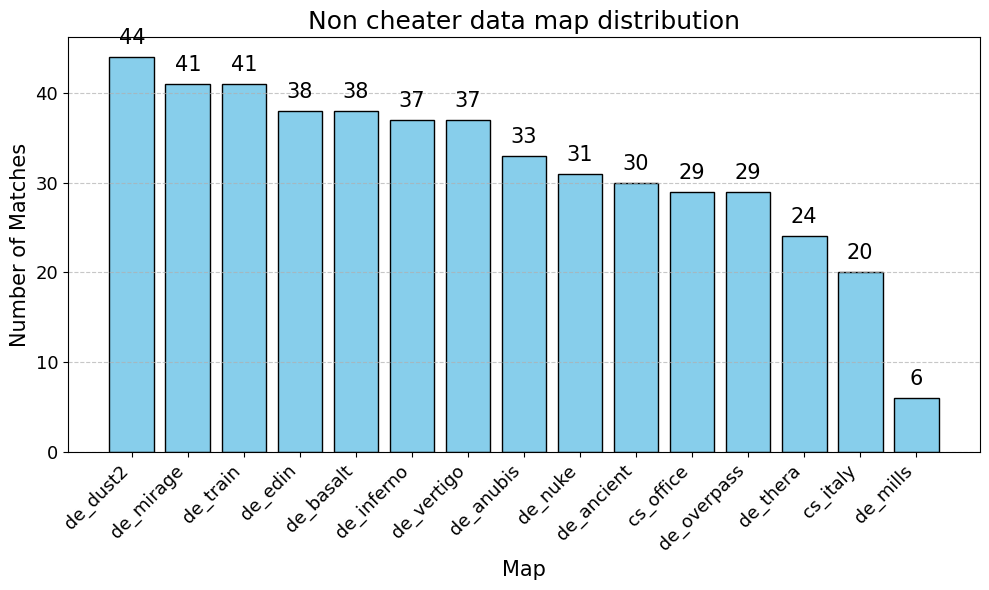

In [99]:
plot_map_distribution(all_maps, title="Non cheater data map distribution")

In [94]:
all_maps_cheater = []

for ev_file in CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    ev = json_2_eventlist(ev_file)
    csstats_idx = -1
    for idx, val in enumerate(ev):
        if val[0] == "CSstats_info":
            csstats_idx = idx
            break
    if csstats_idx == -1:
        raise Exception("not found")
    # all_maps.append(ev[csstats_idx][1])
    map = ev[csstats_idx][1]["map"].to_string()
    all_maps_cheater.append(map.replace("0    ",""))


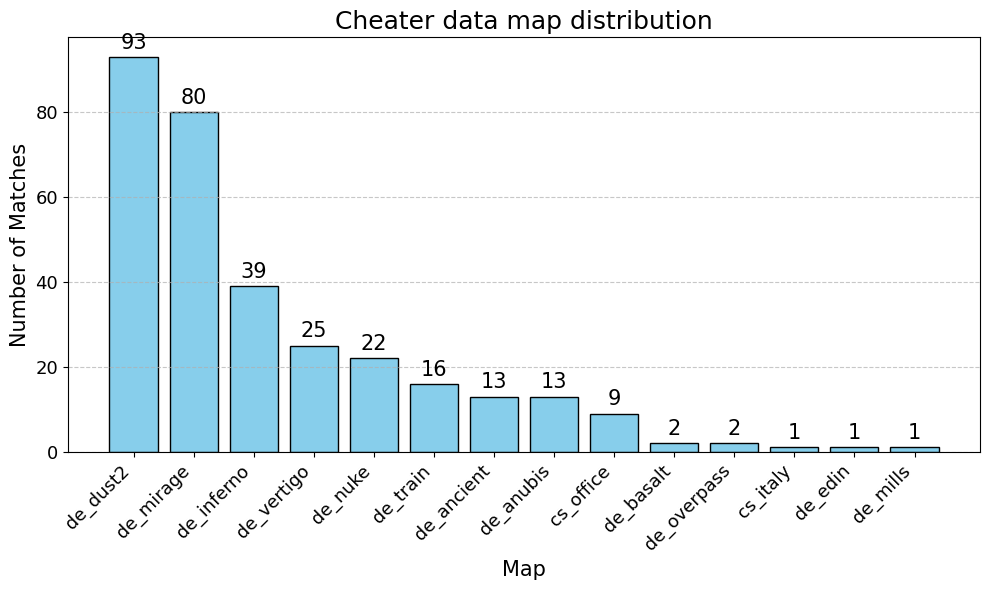

In [100]:
plot_map_distribution(all_maps_cheater, title="Cheater data map distribution")

In [49]:
def plot_mm_rank_distribution(rank_list, title="Rank Distribution", figsize=(10, 6)):
    rank_counts = Counter(rank_list)
    maps = list(rank_counts.keys())
    counts = list(rank_counts.values())
    rank_order = ["Unknown", "Silver I", "Silver II", "Silver III", "Silver IV", "Silver Elite", "Silver Elite Master", "Gold Nova I",
                 "Gold Nova II", "Gold Nova III", "Master Guardian I", "Master Guardian II", "Distinguished Master Guardian"]
    values = [rank_counts[label] if label in rank_counts else 0 for label in rank_order]

    plt.figure(figsize=figsize)
    bars = plt.bar(rank_order, values, color='skyblue', edgecolor='black')
    plt.title(title + f" n = ({len(rank_list)})", fontsize=18)
    plt.xlabel("Matchmaking Rank", fontsize=15)
    plt.ylabel("Number of Matches", fontsize=15)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=13)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontsize=11)

    plt.tight_layout()
    plt.show()

def plot_prem_rank_distribution(rank_list, title):
    bins = list(range(0, 25001, 2500))
    plt.figure(figsize=(10, 6))
    counts, bin_edges, patches = plt.hist(rank_list, bins=bins, edgecolor='black', color='skyblue')
    plt.title(title + f" n = ({len(rank_list)})", fontsize=18)
    plt.xlabel("Premier rank", fontsize=15)
    plt.ylabel("Number of Matches", fontsize=15)
    plt.xticks(bins)
    plt.yticks(fontsize=13)

    for count, patch in zip(counts, patches):
        height = patch.get_height()
        if height > 0:
            plt.text(patch.get_x() + patch.get_width() / 2, height, 
                     str(int(count)), ha='center', va='bottom', fontsize=11)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [20]:
prem_rank_cheater = []
prem_rank_noncheater = []
mm_rank_cheater = []
mm_rank_noncheater = []

for ev_file in CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    ev = json_2_eventlist(ev_file)
    csstats_idx = -1
    for idx, val in enumerate(ev):
        if val[0] == "CSstats_info":
            csstats_idx = idx
            break
    csstats_info = ev[csstats_idx][1]
    game_type = csstats_info['match_making_type'][0]
    if game_type == "Official Matchmaking":
        mm_rank_cheater.append(csstats_info['avg_rank'][0])
    else:
        prem_rank_cheater.append(int(csstats_info['avg_rank'][0]))

for ev_file in NO_CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    ev = json_2_eventlist(ev_file)
    csstats_idx = -1
    for idx, val in enumerate(ev):
        if val[0] == "CSstats_info":
            csstats_idx = idx
            break
    csstats_info = ev[csstats_idx][1]
    game_type = csstats_info['match_making_type'][0]
    if game_type == "Official Matchmaking":
        mm_rank_noncheater.append(csstats_info['avg_rank'][0])
    else:
        prem_rank_noncheater.append(int(csstats_info['avg_rank'][0]))

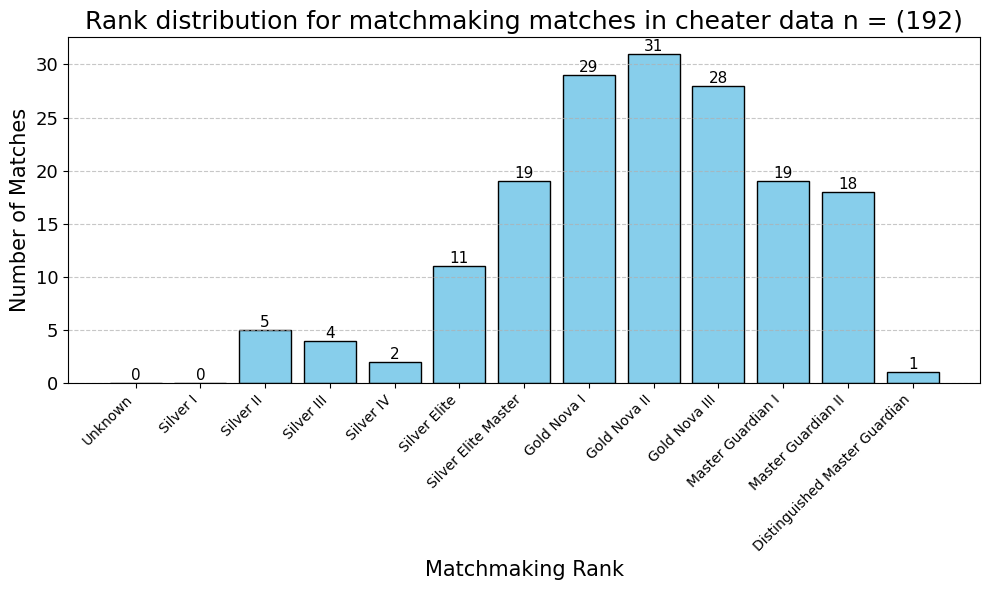

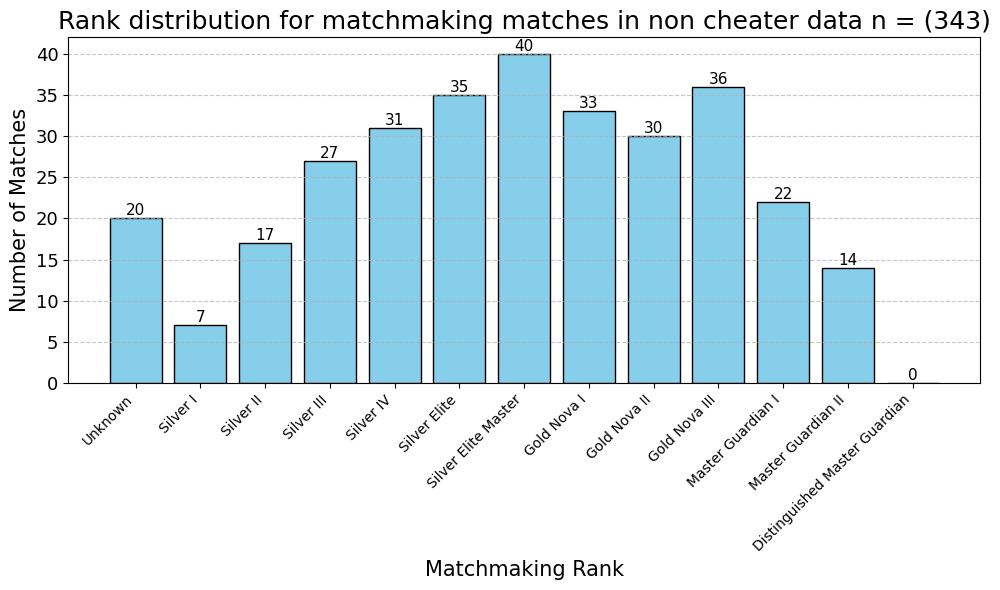

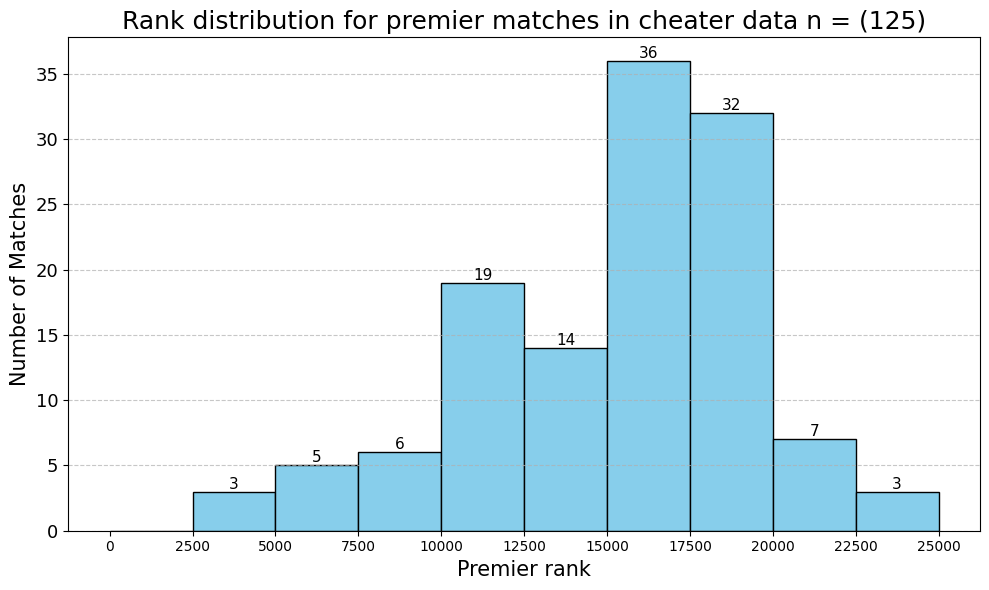

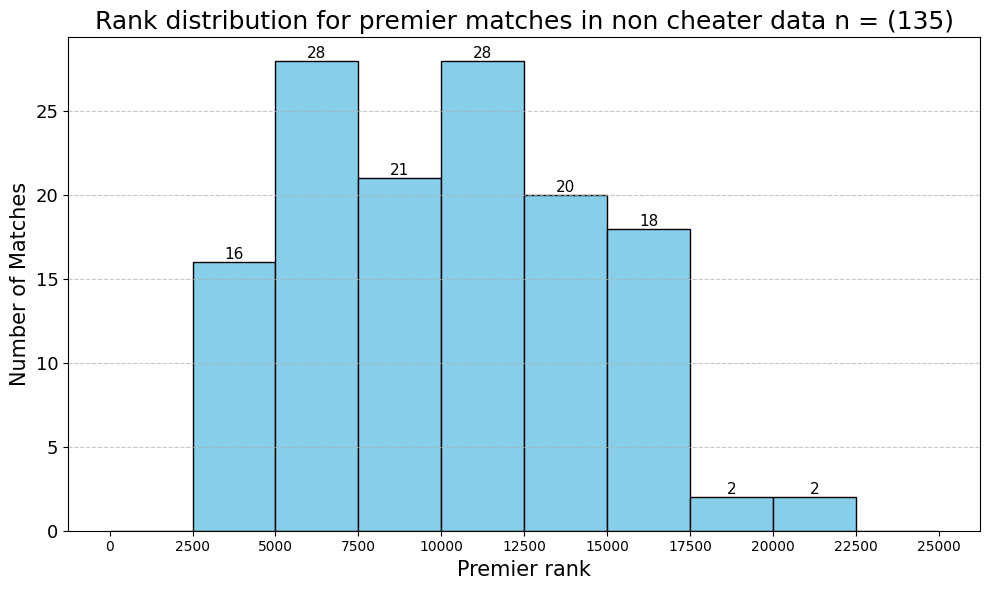

In [50]:
plot_mm_rank_distribution(mm_rank_cheater, "Rank distribution for matchmaking matches in cheater data")
plot_mm_rank_distribution(mm_rank_noncheater, "Rank distribution for matchmaking matches in non cheater data")
plot_prem_rank_distribution(prem_rank_cheater, "Rank distribution for premier matches in cheater data")
plot_prem_rank_distribution(prem_rank_noncheater, "Rank distribution for premier matches in non cheater data")

In [87]:
cheaters_ratio_global = []
non_cheaters_ratio_global = []

def get_shots_per_kill_ratio(filepath, contains_cheaters):
    cheats_ratio = []
    non_cheater_ratio = []
    weapon_fire_idx = -1
    player_death_idx = -1
    csstats_idx = -1
    cheaters_idx = -1
    ev = json_2_eventlist(filepath)
    for idx, i in enumerate(ev):
        if i[0] == "weapon_fire":
            weapon_fire_idx = idx
        if i[0] == "player_death":
            player_death_idx = idx
        if i[0] == "CSstats_info":
            csstats_idx = idx
        if i[0] == "cheaters":
            cheaters_idx = idx
    if weapon_fire_idx == -1 or player_death_idx == -1 or csstats_idx == -1 or (cheaters_idx == -1 and contains_cheaters == True):
        print(f"NOT FOUND IN {ev_file}")
        return [], []
    cheaters = []
    if contains_cheaters:
        cheaters = ev[cheaters_idx][1]["steamid"].to_list()
    shots = ev[weapon_fire_idx][1]['user_steamid'].value_counts()
    kills = ev[player_death_idx][1]["user_steamid"].value_counts()
    for player in all_players:
        s = shots.get(player, 0)
        k = kills.get(player, 0)
        if s != 0 and k != 0:
            ratio = round(s / k, 1)
            if player in cheaters:
                cheats_ratio.append(ratio)
            else:
                non_cheater_ratio.append(ratio)
    return cheats_ratio, non_cheater_ratio

for ev_file in CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    c, n = get_shots_per_kill_ratio(ev_file, True)
    for i in c:
        cheaters_ratio_global.append(i)
    for i in n:
        non_cheaters_ratio_global.append(i)

for ev_file in NO_CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    c, n = get_shots_per_kill_ratio(ev_file, False)
    for i in n:
        non_cheaters_ratio_global.append(i)

NOT FOUND IN C:\Users\gluzk\Desktop\parsed_data\no_cheater_present\455.json


7803
1279
6524


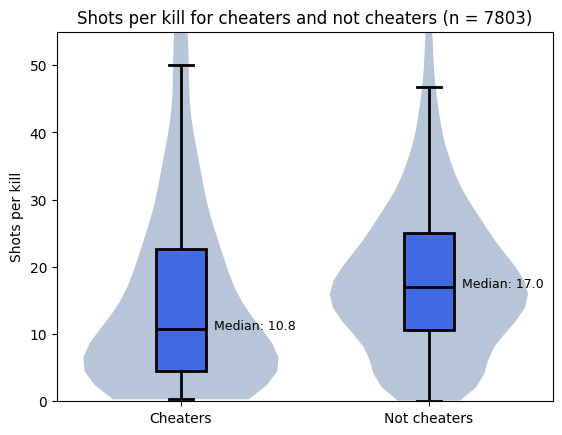

In [90]:
print(len(cheaters_ratio_global) + len(non_cheaters_ratio_global))
print(len(cheaters_ratio_global))
print(len(non_cheaters_ratio_global))
df = pd.DataFrame({
    'Value': cheaters_ratio_global + non_cheaters_ratio_global,
    'Group': ['Cheaters'] * len(cheaters_ratio_global) + ['Not cheaters'] * len(non_cheaters_ratio_global)
})


sns.violinplot(x='Group', y='Value', data=df, bw_adjust=1, cut=0, inner=None, color='lightsteelblue', linewidth=0)

groups = df['Group'].unique()
plt.ylim((0, 55))
ax = sns.boxplot(x='Group', y='Value', data=df, 
    showcaps=True,
    boxprops={'facecolor': 'royalblue', 'edgecolor': 'black'},  # lighter blue
    whiskerprops={'color': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'},
    showfliers=False,
    linewidth=2,
    width=0.2)
for i, group in enumerate(groups):
    group_values = df[df['Group'] == group]['Value']
    median_val = group_values.median()
    ax.text(i + 0.3, median_val-0.1, f"Median: {median_val:.1f}", color='black', ha='center', fontsize=9)
plt.title("Shots per kill for cheaters and not cheaters (n = 7803)")
plt.xlabel(None)
plt.ylabel("Shots per kill")
plt.show()

In [31]:
def get_avg_vel(filepath, contains_cheaters):
    cheaters_mean_vel = []
    non_cheaters_mean_vel = []
    cheaters_idx = -1
    df = pd.read_parquet(filepath)
    ev = json_2_eventlist(str(filepath).replace("parquet", "json"))
    for i, val in enumerate(ev):
        if val[0] == "cheaters":
            cheaters_idx = i
    if cheaters_idx == -1 and contains_cheaters == True:
        print(f"NOT FOUND IN {ev_file}")
    cheaters = []
    if contains_cheaters:
        cheaters = ev[cheaters_idx][1]["steamid"].to_list()
    for player in all_players:
        mean_vel = df[(df['steamid'] == player) & (df['velocity'] > 0)]['velocity'].dropna().mean()
        if player in cheaters:
            cheaters_mean_vel.append(mean_vel)
        else:
            non_cheaters_mean_vel.append(mean_vel)
    return cheaters_mean_vel, non_cheaters_mean_vel

In [33]:
cheaters_mean_vel_global = []
non_cheaters_mean_vel_global = []

for ev_file in NO_CHEATER_PATH.glob("*" + TICK_FILE_TYPE):
    c, n = get_avg_vel(ev_file, False)
    for i in n:
        non_cheaters_mean_vel_global.append(i)

print("here")

for ev_file in CHEATER_PATH.glob("*" + TICK_FILE_TYPE):
    c, n = get_avg_vel(ev_file, True)
    for i in c:
        cheaters_mean_vel_global.append(i)
    for i in n:
        non_cheaters_mean_vel_global.append(i)



here


In [37]:
df = pd.DataFrame({
    'non_cheaters_mean_vel': non_cheaters_mean_vel_global
})
df.to_csv("vels_noncheat.csv")
df = pd.DataFrame({
    'cheaters_mean_vel': cheaters_mean_vel_global
})
df.to_csv("vels_cheat.csv")

In [95]:
cheaters_mean_vel_global = pd.read_csv('vels_cheat.csv')['cheaters_mean_vel'].tolist()
non_cheaters_mean_vel_global = pd.read_csv('vels_noncheat.csv')['non_cheaters_mean_vel'].tolist()
# print(cheaters_mean_vel_global)

7488
1160
6328


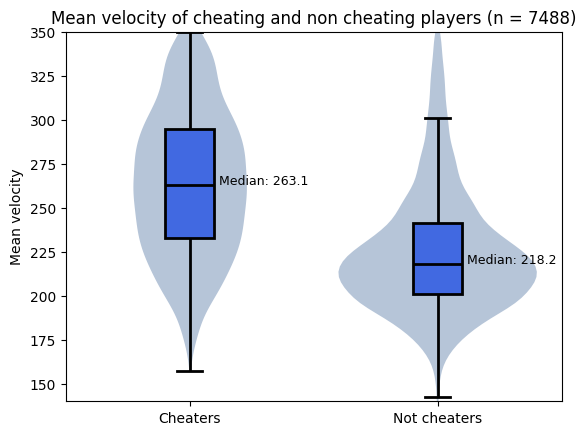

In [100]:
non_cheaters_mean_vel_global = [x for x in non_cheaters_mean_vel_global if x <= 350]
cheaters_mean_vel_global = [x for x in cheaters_mean_vel_global if x <= 350]
print(len(cheaters_mean_vel_global) + len(non_cheaters_mean_vel_global))
print(len(cheaters_mean_vel_global))
print(len(non_cheaters_mean_vel_global))
df = pd.DataFrame({
    'Value': cheaters_mean_vel_global + non_cheaters_mean_vel_global,
    'Group': ['Cheaters'] * len(cheaters_mean_vel_global) + ['Not cheaters'] * len(non_cheaters_mean_vel_global)
})

# sns.violinplot(x='Group', y='Value', data=df, bw_adjust=1)
# plt.title("Mean velocity of cheating and non cheating players (n = 7488)")
# plt.ylabel("Mean velocity")
# plt.xlabel(None)
# plt.ylim((0, 400))

# groups = df['Group'].unique()
# for i, group in enumerate(groups):
#     median_val = df[df['Group'] == group]['Value'].median()
#     plt.text(i + 0.02, median_val, f"Median: {median_val:.1f}",
#          ha='left', va='center', fontsize=9, color='black')

# plt.show()

# groups = df['Group'].unique()
# ax = sns.boxplot(x='Group', y='Value', data=df, showfliers=False)
# for i, group in enumerate(groups):
#     group_values = df[df['Group'] == group]['Value']
#     median_val = group_values.median()
#     ax.text(i, median_val - 3, f"Median: {median_val:.1f}", color='black', ha='center', fontsize=9)
# plt.title("Mean velocity of cheating and non cheating players (n = 7488)")
# plt.xlabel(None)
# plt.ylabel("Mean velocity")
# plt.show()

sns.violinplot(x='Group', y='Value', data=df, bw_adjust=1, cut=0, inner=None, color='lightsteelblue', linewidth=0)

groups = df['Group'].unique()
plt.ylim((140, 350))
ax = sns.boxplot(x='Group', y='Value', data=df, 
    showcaps=True,
    boxprops={'facecolor': 'royalblue', 'edgecolor': 'black'},  # lighter blue
    whiskerprops={'color': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'},
    showfliers=False,
    linewidth=2,
    width=0.2)
for i, group in enumerate(groups):
    group_values = df[df['Group'] == group]['Value']
    median_val = group_values.median()
    ax.text(i + 0.3, median_val-0.1, f"Median: {median_val:.1f}", color='black', ha='center', fontsize=9)
plt.title("Mean velocity of cheating and non cheating players (n = 7488)")
plt.xlabel(None)
plt.ylabel("Mean velocity")
plt.show()

In [77]:
def get_avg_kd(filepath, contains_cheaters):
    cheaters_kd = []
    non_cheaters_kd = []
    ev = json_2_eventlist(filepath)
    player_death_idx = -1
    cheaters_idx = -1
    for i, val in enumerate(ev):
        if val[0] == "player_death":
            player_death_idx = i
        if val[0] == "cheaters":
            cheaters_idx = i
    if cheaters_idx == -1 and contains_cheaters == True:
        print(f"NOT FOUND IN {ev_file}")
        return [], []
    cheaters = []
    if contains_cheaters:
        cheaters = ev[cheaters_idx][1]["steamid"].to_list()
    kills = ev[player_death_idx][1]['attacker_steamid'].value_counts()
    deaths = ev[player_death_idx][1]['user_steamid'].value_counts()
    for player in all_players:
        k = kills.get(player, 0)
        d = deaths.get(player, 0)
        if d == 0:
            d = 1
        if player in cheaters:
            cheaters_kd.append(round(k / d, 2))
        else:
            non_cheaters_kd.append(round(k / d, 2))
    return cheaters_kd, non_cheaters_kd


In [78]:
cheaters_kd_global = []
non_cheaters_kd_global = []

for ev_file in NO_CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    c, n = get_avg_kd(ev_file, False)
    for i in n:
        non_cheaters_kd_global.append(i)

print("halfway")

for ev_file in CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    c, n = get_avg_kd(ev_file, True)
    for i in c:
        cheaters_kd_global.append(i)
    for i in n:
        non_cheaters_kd_global.append(i)



halfway


7950
1309
6641


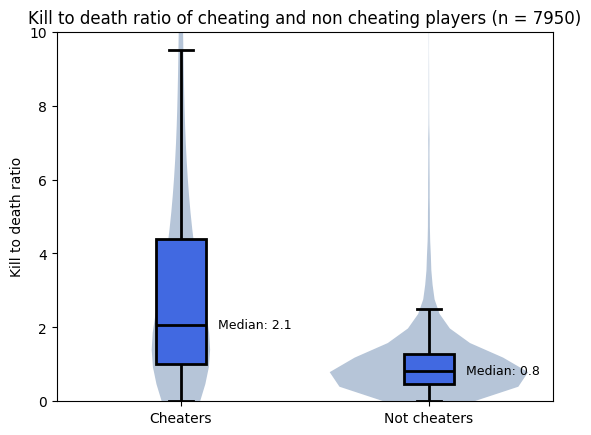

In [ ]:
print(len(cheaters_kd_global) + len(non_cheaters_kd_global))
print(len(cheaters_kd_global))
print(len(non_cheaters_kd_global))
df = pd.DataFrame({
    'Value': cheaters_kd_global + non_cheaters_kd_global,
    'Group': ['Cheaters'] * len(cheaters_kd_global) + ['Not cheaters'] * len(non_cheaters_kd_global)
})

sns.violinplot(x='Group', y='Value', data=df, bw_adjust=1, cut=0, inner=None, color='lightsteelblue', linewidth=0)

groups = df['Group'].unique()
plt.ylim((0, 10))
ax = sns.boxplot(x='Group', y='Value', data=df, 
    showcaps=True,
    boxprops={'facecolor': 'royalblue', 'edgecolor': 'black'},  # lighter blue
    whiskerprops={'color': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'},
    showfliers=False,
    linewidth=2,
    width=0.2)
for i, group in enumerate(groups):
    group_values = df[df['Group'] == group]['Value']
    median_val = group_values.median()
    ax.text(i + 0.3, median_val-0.1, f"Median: {median_val:.1f}", color='black', ha='center', fontsize=9)
plt.title("Kill to death ratio of cheating and non cheating players (n = 7950)")
plt.xlabel(None)
plt.ylabel("Kill to death ratio")
plt.show()

In [35]:
def get_hs_percent(filepath, contains_cheaters):
    cheaters_hs = []
    non_cheaters_hs = []
    ev = json_2_eventlist(filepath)
    player_death_idx = -1
    cheaters_idx = -1
    for i, val in enumerate(ev):
        if val[0] == "player_death":
            player_death_idx = i
        if val[0] == "cheaters":
            cheaters_idx = i
    if cheaters_idx == -1 and contains_cheaters == True:
        print(f"NOT FOUND IN {ev_file}")
        return [], []
    cheaters = []
    if contains_cheaters:
        cheaters = ev[cheaters_idx][1]["steamid"].to_list()
    for player in all_players:
        df = ev[player_death_idx][1]
        df = df[df["attacker_steamid"] == player]
        hs_count = sum(df["headshot"].tolist())
        kill_count = len(df)
        # print(kill_count)
        # return [], []
        if kill_count > 0:
            if player in cheaters:
                cheaters_hs.append(round(hs_count / kill_count * 100, 2))
            else:
                non_cheaters_hs.append(round(hs_count / kill_count * 100, 2))
    return cheaters_hs, non_cheaters_hs

In [39]:
cheaters_hs_global = []
non_cheaters_hs_global = []

for ev_file in NO_CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    c, n = get_hs_percent(ev_file, False)
    for i in n:
        non_cheaters_hs_global.append(i)

print("halfway")

for ev_file in CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    c, n = get_hs_percent(ev_file, True)
    for i in c:
        cheaters_hs_global.append(i)
    for i in n:
        non_cheaters_hs_global.append(i)



halfway


7691
1304
6387


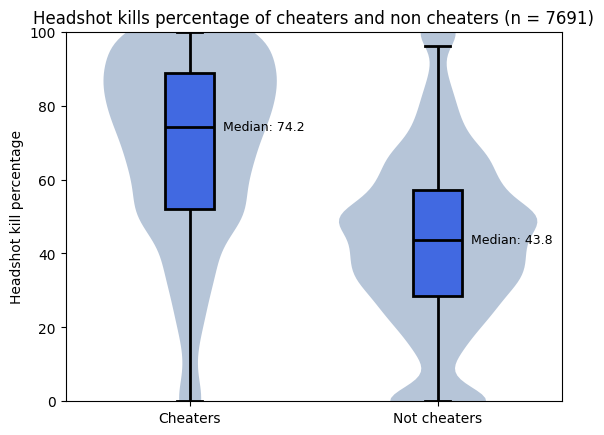

In [ ]:
print(len(cheaters_hs_global) + len(non_cheaters_hs_global))
print(len(cheaters_hs_global))
print(len(non_cheaters_hs_global))
df = pd.DataFrame({
    'Value': cheaters_hs_global + non_cheaters_hs_global,
    'Group': ['Cheaters'] * len(cheaters_hs_global) + ['Not cheaters'] * len(non_cheaters_hs_global)
})

sns.violinplot(x='Group', y='Value', data=df, bw_adjust=1, cut=0, inner=None, color='lightsteelblue', linewidth=0)
plt.title("Headshot kills percentage of cheaters and non cheaters (n = )")
plt.ylabel("Headshot kill percentage")
plt.xlabel(None)



groups = df['Group'].unique()
# plt.ylim((0, 100))
ax = sns.boxplot(x='Group', y='Value', data=df, 
    showcaps=True,
    boxprops={'facecolor': 'royalblue', 'edgecolor': 'black'},  # lighter blue
    whiskerprops={'color': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'},
    showfliers=False,
    linewidth=2,
    width=0.2)
for i, group in enumerate(groups):
    group_values = df[df['Group'] == group]['Value']
    median_val = group_values.median()
    ax.text(i + 0.3, median_val-1, f"Median: {median_val:.1f}", color='black', ha='center', fontsize=9)
plt.title("Headshot kills percentage of cheaters and non cheaters (n = 7691)")
plt.xlabel(None)
plt.ylabel("Headshot kill percentage")
plt.show()